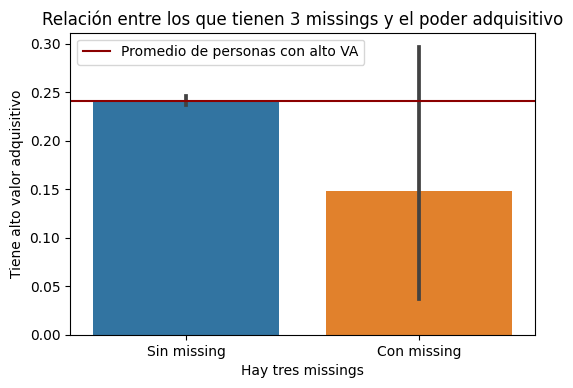

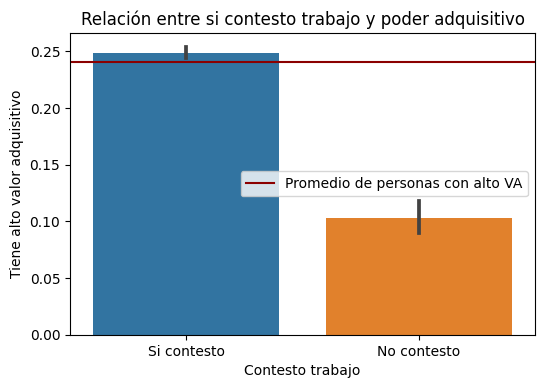

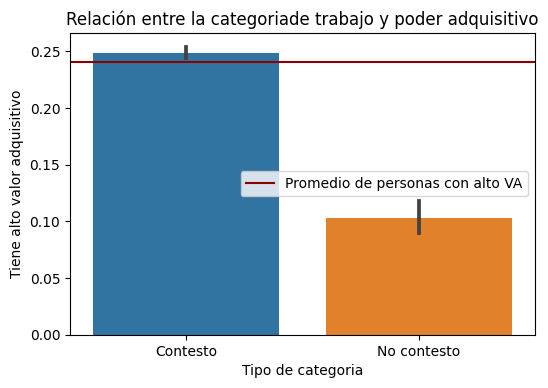

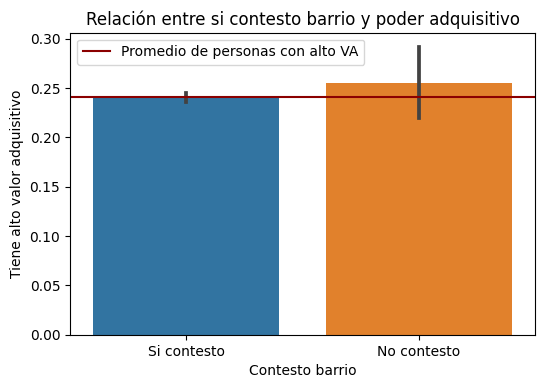

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### trabajo

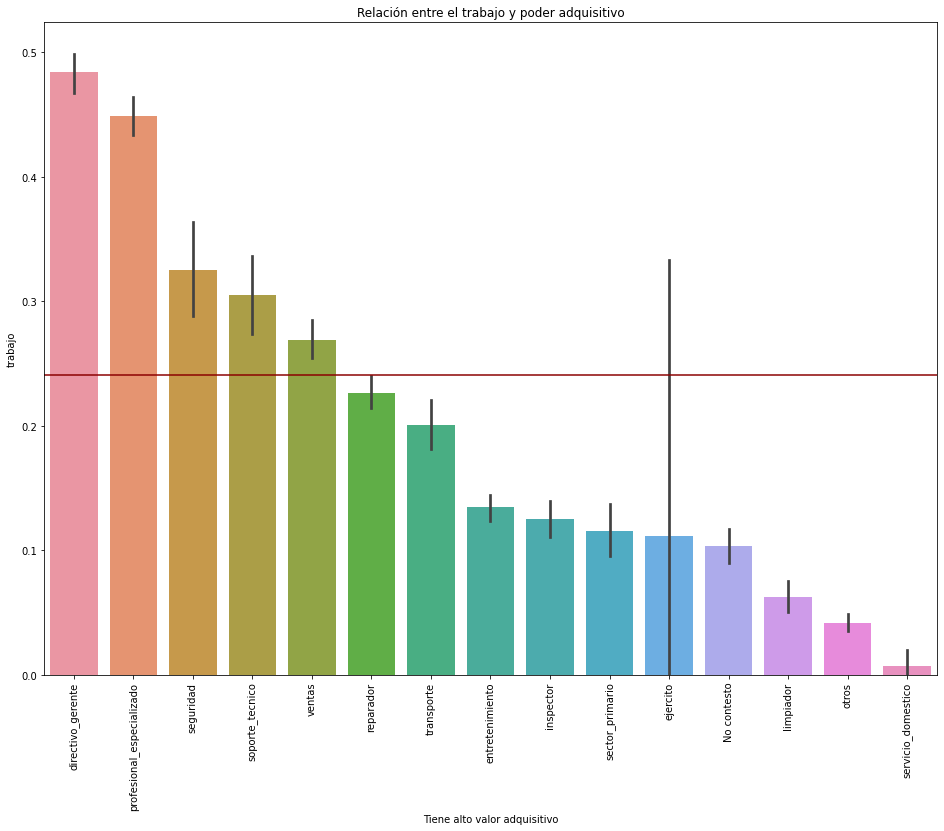

In [2]:
#BARPLOT
plt.figure(figsize=(16, 12))
df_comunas = df[['trabajo', 'tiene_alto_valor_adquisitivo']].copy()
indices = df_comunas.groupby('trabajo')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df,
    x='trabajo',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("trabajo")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks(rotation=90)
plt.title('Relación entre el trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

In [3]:
condicion = (df['trabajo'] == 'directivo_gerente') | (df['trabajo'] == 'profesional_especializado') | (df['trabajo'] == 'seguridad') | (df['trabajo'] == 'soporte_tecnico') | (df['trabajo'] == 'ventas')
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts()

0    8129
1    5304
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [4]:
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().tolist()[1]/df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().sum()

0.3948485074071317

In [5]:
df[condicion]['tiene_alto_valor_adquisitivo'].value_counts().tolist()[1]/df['tiene_alto_valor_adquisitivo'].value_counts().sum()

0.16306453100501123

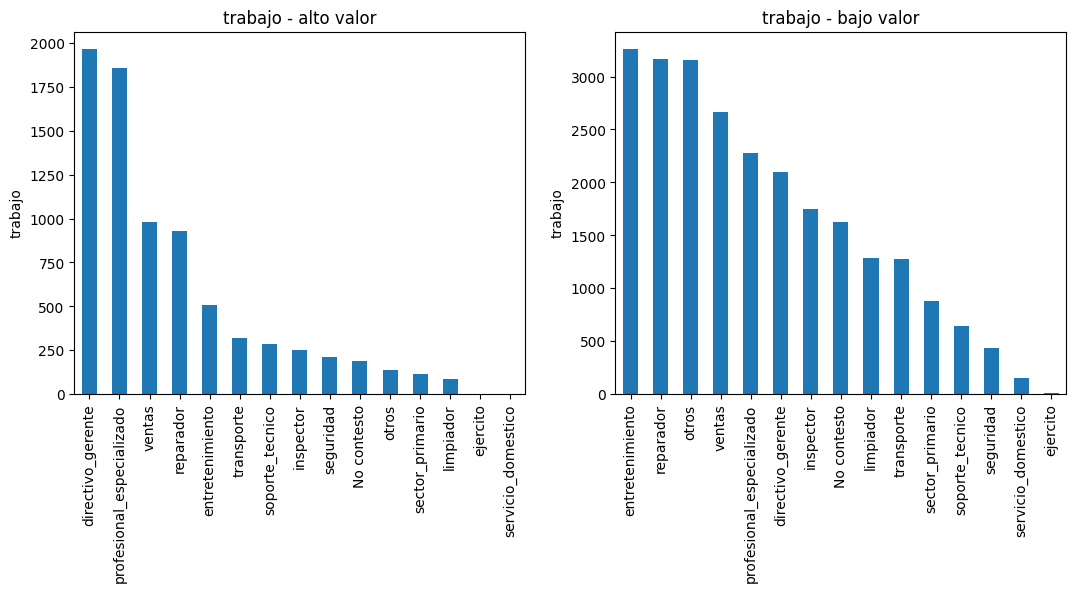

In [6]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_bajo_valor = df[df['tiene_alto_valor_adquisitivo'] != 1]

df_alto_valor.trabajo.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("trabajo - alto valor")
axes[0].set_ylabel("trabajo")

df_bajo_valor.trabajo.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("trabajo - bajo valor")
axes[1].set_ylabel("trabajo")

plt.show()

In [12]:
total_alto_valor = df_alto_valor['trabajo'].value_counts().sum()
condicion = (df_alto_valor['trabajo'] == 'directivo_gerente') | (df_alto_valor['trabajo'] == 'profesional_especializado') | (df_alto_valor['trabajo'] == 'ventas') | (df_alto_valor['trabajo'] == 'reparador')
total_buenos_trabajos = df_alto_valor[condicion].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

73.22955212453746

In [13]:
total_general = df['trabajo'].value_counts().sum()
condicion = (df['trabajo'] == 'directivo_gerente') | (df['trabajo'] == 'profesional_especializado') | (df['trabajo'] == 'ventas') | (df['trabajo'] == 'reparador')
total_buenos_trabajos = df[condicion].value_counts().sum()
total_buenos_trabajos/total_general*100

49.05155716789129